# **Resturant Business Forcasting**

## Introduciton

Philadelphia is city of brotherly love.<br>There are a lot of iconic restaurants famous in philly for their unique taste. <br>A lot of investments are currently taking place in restaurant sector. <br>Our project will aim on helping these investor’s figuring out the optimal location and type of restaurant for their investment.
* This business model/project will provide prediction on how many stars your restaurant would be rated (approximate prediction)depending upon which neighborhood you would like to open.
* This prediction would depend upon the data gathered using foursquare API depending upon the zipcode and also local crime rates happening in that particular area.<br>
Currenlty we are going to used data publicily availabe. More information about the data can be found in the link provided in the **DATA** section of the project. 

* Currently this prediction model will only focus on Local neighborhoods in **Philadelphia area**.

## **Data**

The main data used for this project will be from two sources: The crime rate in each neighborhoods in Philadelphia. (data.philly.com) The venues in each neighborhood. (FourSquare API).


* Foursquare API will be used for data to would gather resources for restaurant's in Philadelphia.<br>This include all different types of restaurants and their respective rating.

* We will also gather crime rates that take place in Philadelphia neighborhood from online web sources using web scraping. Currently we will be implementing web scraping only on one website - <a href="http://data.philly.com/philly/crime/?" target="_blank">Crime rate</a>. 
    
<br> A snap shot of the data used for crime rate is provided below.
![Crime rate example](crime_rate.png)

# **Future Improvements:**

1. Implement same idea for Real estate buyers.
2. Get neighbourhood crime rate and depending upon that show relevant resturant and possible sites to open up resturants/real estate/car repaire shops/dealerships

In [1]:
###
#FourSquare APP Credentials
###

CLIENT_ID = 'SNQZMQV5JVCFLKCELMCSAK3FUNWAI24SZQELRN0CDF3D0GJE' # your Foursquare ID
CLIENT_SECRET = '3AZYPZE2OA0BGGFTGYYJLZON2NQBKAORWHMJT4VJWLP2QWZV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SNQZMQV5JVCFLKCELMCSAK3FUNWAI24SZQELRN0CDF3D0GJE
CLIENT_SECRET:3AZYPZE2OA0BGGFTGYYJLZON2NQBKAORWHMJT4VJWLP2QWZV


In [2]:
####make sure all these libraries are installed 

# !conda install -c conda-forge selenium --yes # Install selenium for conda
# !conda install -c anaconda beautifulsoup4 --yes #Install beautifulsoup
# !conda install -c anaconda lxml --yes
# !conda install -c anaconda html5lib --yes
# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
# !conda install -c anaconda wget --yes


import numpy as np
import urllib.request
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import folium # map rendering library

In [3]:
# URL for the wikipedia page is given below
crime_url = "http://data.philly.com/philly/crime/?"
# assign a variabl to the page or import the page into a variable
page = urllib.request.urlopen(crime_url)

In [4]:
#convert the page (HTML) into beautiful soupe format
# soup = BeautifulSoup(page, "html5lib")
soup = BeautifulSoup(page, "xml")
# soup
# print(soup.prettify())

In [5]:
all_tables=soup.find_all("table")
# all_tables

In [6]:
right_table=soup.find('table', class_="display table table-striped table-bordered dt-responsive")

In [7]:
# right_table

In [8]:
# assigning variables which will be used for loading values in dataframe which will be created later
a,b,c,d,e=[],[],[],[],[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    length = len(cells)
    index = 0
    if length>4:
        while(index < length):
#         for index in range(length)
            a.append(cells[index].find(text=True))
            b.append(cells[index+1].find(text=True))
            c.append(cells[index+2].find(text=True))
            d.append(cells[index+3].find(text=True))
            e.append(cells[index+4].find(text=True))
            
            index = index + 5
        
df=pd.DataFrame(a,columns=['Neighborhood'])
df['Population']=b
df['Violence']=c
df['PropertyCrime']=d
crime_table = df.drop_duplicates() ##drop duplicate rows to get unique values
crime_table['Neighborhood'] = crime_table['Neighborhood'].str.split('/').str[0] ## remove values after slash/

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
# df
crime_table

,Neighborhood,Population,Violence,PropertyCrime
0,Allegheny West,"17,022",0.70,4.35
1,Bella Vista,"28,191",0.18,2.16
2,Bridesburg,"6,289",0.32,2.39
3,Bustleton,"40,731",0.00,0.83
4,Cedarbrook,"33,535",0.24,1.19
5,Center City,"57,668",0.54,4.11
6,Chestnut Hill,"10,556",0.19,0.85
7,East Falls,"9,841",0.51,3.05
8,East Germantown,"27,052",1.11,3.47
9,East Mount Airy,"13,997",0.36,0.64


In [10]:

### geocoder not working for some reason
### If anyone is able to find a fix for this do let me know

# !conda install -c conda-forge/label/gcc7 geocoder --yes
# import geocoder # import geocoder
# lat_lng_coords = None
# while (lat_lng_coords is None):
#     g = geocoder.google('Mountain View, CA')
#     lat_lng_coords=g.latlng

# print(lat_lng_coords)

###

In [11]:
# !conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="specify_your_app_name_here")
geolocator = Nominatim( user_agent="capstone" , timeout = 3)
# location = None
location = geolocator.geocode('{}, PA'.format(crime_table['Neighborhood'][0]))
latitude = location.latitude
longitude = location.longitude
# lats_langs = pd.DataFrame(location,columns=['address'])
# lats_langs = geolocator.geocode('{}, PA'.format(crime_table['Neighborhood']))

In [12]:
# conda install -c conda-forge geopandas

##unable to install geopandas on my machine...hence using traditional for loop for getting co-ordinates

In [13]:
import time
a,b=[],[]

for index in crime_table['Neighborhood']:
    time.sleep(.1)
    location = geolocator.geocode('{}, PA'.format(index))
    a.append(location.latitude)
    b.append(location.longitude)

crime_table['latitude'] = a
crime_table['longitude'] = b

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [14]:
crime_table

,Neighborhood,Population,Violence,PropertyCrime,latitude,longitude
0,Allegheny West,"17,022",0.70,4.35,40.008446,-75.177956
1,Bella Vista,"28,191",0.18,2.16,8.205820,-81.620953
2,Bridesburg,"6,289",0.32,2.39,40.000390,-75.069618
3,Bustleton,"40,731",0.00,0.83,40.082611,-75.031560
4,Cedarbrook,"33,535",0.24,1.19,40.083166,-75.159898
5,Center City,"57,668",0.54,4.11,4.297723,11.543391
6,Chestnut Hill,"10,556",0.19,0.85,40.077055,-75.207400
7,East Falls,"9,841",0.51,3.05,40.014557,-75.191568
8,East Germantown,"27,052",1.11,3.47,41.379317,-74.699198
9,East Mount Airy,"13,997",0.36,0.64,40.064000,-75.186566


In [15]:
LIMIT = 100
import requests

def getNearbyVenues(names, latitudes, longitudes, radius=150):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [16]:
philly_venues = getNearbyVenues(names= crime_table['Neighborhood'],
                                latitudes= crime_table['latitude'],
                                longitudes= crime_table['longitude'])



Allegheny West
Bella Vista
Bridesburg
Bustleton
Cedarbrook
Center City
Chestnut Hill
East Falls
East Germantown
East Mount Airy
Eastwick
Fairhill
Fairmount
Fox Chase
Frankford
Germantown
Grays Ferry
Holmesburg
Hunting Park
Juniata Park
Kensington
Kingsessing
Lawncrest
Logan
Manayunk
Mantua
Mayfair
North Philadelphia
North Philadelphia
Northeast Philadelphia
Northern Liberties
Oak Lane
Olney
Overbrook
Oxford Circle
Parkland
Point Breeze
Port Richmond
Powelton
Queen Village
Rhawnhurst
Roxborough
Schuylkill
Somerton
South Philadelphia
South Philadelphia
Southwest Philadelphia
Tacony
Tioga
Torresdale
University City
West Mount Airy
West Oak Lane
West Philadelphia
West Philadelphia
Wynnefield


In [17]:
philly_venues.shape
philly_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allegheny West,40.008446,-75.177956,Planet Fitness,40.008568,-75.176718,Gym / Fitness Center
1,Allegheny West,40.008446,-75.177956,Hair Buzz,40.008979,-75.176366,Health & Beauty Service
2,Bridesburg,40.000390,-75.069618,Bridesburg Rec Center Gym,40.000001,-75.068547,Gym / Fitness Center
3,Bridesburg,40.000390,-75.069618,Aqua String Band,40.000140,-75.068374,Zoo Exhibit
4,Bridesburg,40.000390,-75.069618,Bridgeview Cafe,39.999690,-75.069030,Café


Analyze neighbourhoods


In [18]:
# one hot encoding
philly_onehot = pd.get_dummies(philly_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
philly_onehot['Neighborhood'] = philly_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [philly_onehot.columns[-1]] + list(philly_onehot.columns[:-1])
philly_onehot = philly_onehot[fixed_columns]

philly_onehot.head()

,Neighborhood,American Restaurant,Art Gallery,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bed & Breakfast,Boutique,...,Skating Rink,Speakeasy,Sporting Goods Shop,Supermarket,Tea Room,Thai Restaurant,Thrift / Vintage Store,Train Station,Yoga Studio,Zoo Exhibit
0,Allegheny West,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Allegheny West,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bridesburg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bridesburg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Bridesburg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
philly_grouped = philly_onehot.groupby('Neighborhood').mean().reset_index()
philly_grouped

,Neighborhood,American Restaurant,Art Gallery,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bed & Breakfast,Boutique,...,Skating Rink,Speakeasy,Sporting Goods Shop,Supermarket,Tea Room,Thai Restaurant,Thrift / Vintage Store,Train Station,Yoga Studio,Zoo Exhibit
0,Allegheny West,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,...,0.000000,0.00,0.00,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.00
1,Bridesburg,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,...,0.000000,0.00,0.00,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.25
2,Chestnut Hill,0.040000,0.04,0.000000,0.040000,0.120000,0.04,0.0,0.0,0.0,...,0.000000,0.00,0.04,0.0,0.0,0.04,0.000000,0.000000,0.000000,0.00
3,East Falls,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,...,0.000000,0.00,0.00,0.0,0.0,0.00,0.333333,0.000000,0.000000,0.00
4,East Germantown,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,...,0.000000,0.00,0.00,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.00
5,East Mount Airy,0.333333,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,...,0.000000,0.00,0.00,0.0,0.0,0.00,0.000000,0.000000,0.333333,0.00
6,Fairhill,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,...,0.000000,0.00,0.00,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.00
7,Fairmount,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,...,0.000000,0.00,0.00,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.00
8,Frankford,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,...,0.000000,0.25,0.00,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.00
9,Germantown,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,...,0.000000,0.00,0.00,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.00


In [20]:
###Create a dataframe with top 10 venues for each neighbourhood
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = philly_grouped['Neighborhood']

for ind in np.arange(philly_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(philly_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allegheny West,Gym / Fitness Center,Health & Beauty Service,Art Gallery,Fast Food Restaurant,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Ethiopian Restaurant,Farmers Market
1,Bridesburg,Zoo Exhibit,Coffee Shop,Café,Gym / Fitness Center,Thai Restaurant,Ethiopian Restaurant,Deli / Bodega,Discount Store,Dog Run,Donut Shop
2,Chestnut Hill,Bank,Coffee Shop,American Restaurant,Record Shop,Flower Shop,Farmers Market,Ice Cream Shop,Italian Restaurant,Market,Paper / Office Supplies Store
3,East Falls,Thrift / Vintage Store,Food Truck,Flower Shop,Zoo Exhibit,Ethiopian Restaurant,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant
4,East Germantown,Scenic Lookout,Zoo Exhibit,Convenience Store,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Ethiopian Restaurant,Farmers Market


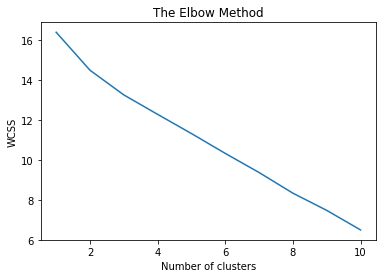

In [21]:
##getting optimal number of clusrters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

philly_clustring = philly_grouped.drop('Neighborhood', 1)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 12)
    kmeans.fit(philly_clustring)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
import numpy as np

nm_this = crime_table.copy()  ## This copy error was too me 2 hrs to learn

names = ['Violence', 'PropertyCrime']


nm_this.loc[:,['Violence','PropertyCrime']] = nm_this.loc[:,['Violence','PropertyCrime']].astype(float)


for index in names:
    nm_this.loc[:,index] = (nm_this.loc[:,index]-nm_this.loc[:,index].min())/ (nm_this.loc[:,index].max()-nm_this.loc[:,index].min())


# crime_table.head()

,Neighborhood,Population,Violence,PropertyCrime,latitude,longitude
0,Allegheny West,"17,022",0.70,4.35,40.008446,-75.177956
1,Bella Vista,"28,191",0.18,2.16,8.205820,-81.620953
2,Bridesburg,"6,289",0.32,2.39,40.000390,-75.069618
3,Bustleton,"40,731",0.00,0.83,40.082611,-75.031560
4,Cedarbrook,"33,535",0.24,1.19,40.083166,-75.159898


In [23]:
nm_this.head()

,Neighborhood,Population,Violence,PropertyCrime,latitude,longitude
0,Allegheny West,"17,022",0.223642,0.204520,40.008446,-75.177956
1,Bella Vista,"28,191",0.057508,0.083793,8.205820,-81.620953
2,Bridesburg,"6,289",0.102236,0.096472,40.000390,-75.069618
3,Bustleton,"40,731",0.000000,0.010474,40.082611,-75.031560
4,Cedarbrook,"33,535",0.076677,0.030320,40.083166,-75.159898
